## [MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.MNIST('./data', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.MNIST'>


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

L 28 28


In [9]:
print(type(target))

<class 'int'>


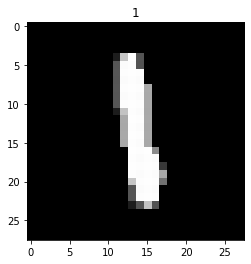

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.MNIST('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


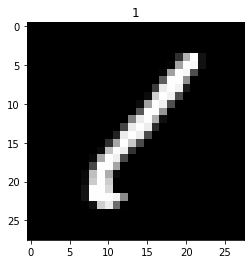

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


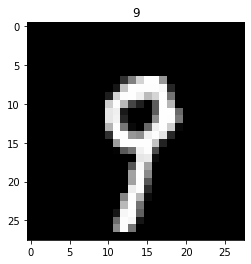

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
#compose = transforms.Compose([
#    transforms.ToTensor()
#])

compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.MNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.MNIST(root='./data/', train=False, transform=compose, download=True)

In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
class MNISTModel(nn.Module):
    def __init__(self, output_size):
        super(MNISTModel, self).__init__()
        self.cv = nn.Sequential(
                # (input size - kernel size + 2 * paddning) / stride + 1
                nn.Conv2d(1, 8, kernel_size=3), # 1 = input channel size(gray), 8 = output(filter) volume size (n, 8, 26, 26)
                                              # padding = 0, stride = (1, 1)
                nn.ReLU(),
                nn.MaxPool2d(2), # (n, 8, 13, 13)
                nn.Conv2d(8, 16, kernel_size=3), # (n, 16, 11, 11)
                nn.ReLU(),
                nn.Conv2d(16, 32, kernel_size=3), # (n, 32, 9, 9)
                nn.ReLU(),
                nn.Conv2d(32, 32, kernel_size=1), # (n, 32, 9, 9)
                nn.ReLU()
        )

        self.fc = nn.Sequential(nn.Linear(32*9*9, output_size),
              )        
        
    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 32*9*9)
        output = self.fc(x)
        result = F.softmax(output, dim=0)
        with torch.no_grad():
            value = torch.max(result, 1)[1]
        return result, value

In [22]:
model = MNISTModel(10).to(device)

In [23]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(y.sum(dim=1))
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[0.1008, 0.1000, 0.0993, 0.0990, 0.1000, 0.1001, 0.0991, 0.0999, 0.0996,
         0.0999],
        [0.1004, 0.1014, 0.0992, 0.1008, 0.0994, 0.0998, 0.0995, 0.1004, 0.1008,
         0.1007],
        [0.1003, 0.0993, 0.0997, 0.1005, 0.1007, 0.1013, 0.1004, 0.1002, 0.0993,
         0.1009],
        [0.0995, 0.1002, 0.0998, 0.0992, 0.0998, 0.0997, 0.0996, 0.0998, 0.1010,
         0.1009],
        [0.1004, 0.1002, 0.1009, 0.0998, 0.0991, 0.1001, 0.1002, 0.0999, 0.0994,
         0.1000],
        [0.0998, 0.0994, 0.1000, 0.1001, 0.1009, 0.1008, 0.1005, 0.0995, 0.0990,
         0.1000],
        [0.1002, 0.1008, 0.1002, 0.1009, 0.1000, 0.0995, 0.0998, 0.1022, 0.0989,
         0.0994],
        [0.0999, 0.0992, 0.1003, 0.1000, 0.1001, 0.0996, 0.0998, 0.0990, 0.1006,
         0.0994],
        [0.1003, 0.0996, 0.1009, 0.1001, 0.1001, 0.0992, 0.1005, 0.0992, 0.1000,
         0.0998],
        [0.0984, 0.1000, 0.0997, 0.0996, 0.0999, 0.0999, 0.1006, 0.0999, 0.1013,


In [24]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [25]:
model = MNISTModel(10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

for epoch in range(n_epochs):
    total_loss = 0
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        y, _ = model(data)
        del data
        loss = criterion(y, target)
        del target
        total_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('epoch {}th loss: {}'.format(epoch, total_loss / 60))

epoch 0th loss: 2.2965333978335063
epoch 1th loss: 2.29368101755778
epoch 2th loss: 2.293649065494537
epoch 3th loss: 2.2936401844024656
epoch 4th loss: 2.2936342636744182
epoch 5th loss: 2.2936291416486103
epoch 6th loss: 2.2936249494552614
epoch 7th loss: 2.293621663252513
epoch 8th loss: 2.293619084358215
epoch 9th loss: 2.2936170657475787


In [26]:
model = MNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        del train_target
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1

    model.eval()
    n_test = 0
    test_loss = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, _ = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1

    print('epoch {}th training loss: {} test loss: {}'.format(epoch, train_loss / n_train, test_loss / n_test))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 2.296713133653005 test loss: 2.293753457069397
epoch 1th training loss: 2.293693010012309 test loss: 2.293663430213928
epoch 2th training loss: 2.2936564366022747 test loss: 2.293650245666504
epoch 3th training loss: 2.2936450044314065 test loss: 2.2936423778533936
epoch 4th training loss: 2.2936369299888613 test loss: 2.293634796142578
epoch 5th training loss: 2.2936304211616516 test loss: 2.2936296224594117
epoch 6th training loss: 2.2936254223187764 test loss: 2.2936233282089233
epoch 7th training loss: 2.293620836734772 test loss: 2.2936203479766846
epoch 8th training loss: 2.2936176379521687 test loss: 2.293618178367615
epoch 9th training loss: 2.2936145544052122 test loss: 2.293615388870239


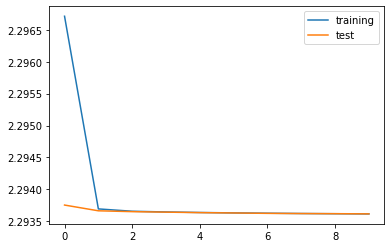

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.875
